# Preprocessing
Training dataset is the EMNIST ByClass set containing 62 classes. Each observation is a 784 feature vector plus a label. New predictions can be made by feeding in an n by 784 csv file (for n characters) and calling model.predict() on the file. The output should be an array of the predicted classes.

In [409]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model

np.set_printoptions(precision=3, suppress=True)

In [410]:
import tensorflow_datasets as tfds

In [411]:
print(tf.__version__)

2.11.0


In [412]:
ds_train = pd.read_csv('emnist-byclass-train.csv')
ds_test = pd.read_csv('emnist-byclass-test.csv')

#ds_train = pd.read_csv('emnist-letters-train.csv')
#ds_test = pd.read_csv('emnist-letters-test.csv')

In [413]:
# Map classes from class number to character value
class_map = {}
with open("emnist-byclass-mapping.txt") as file:
    for line in file:
        (key, value) = line.split()
        class_map[int(key)] = chr(int(value))
num_classes: int = len(class_map)

In [414]:
print("Training shape: " + str(ds_train.shape))
print("Testing shape: " + str(ds_test.shape))

Training shape: (697931, 785)
Testing shape: (116322, 785)


In [415]:
# Separate the testing and training vectors from their labels
train_images = np.array(ds_train.iloc[:,1:])
train_labels = np.array(ds_train.iloc[:,0])

test_images = np.array(ds_test.iloc[:,1:])
test_labels = np.array(ds_test.iloc[:,0])


In [416]:
# Normalize images from [0, 255] to [0, 0]
train_images = train_images / 255.0
test_images = test_images / 255.0


In [417]:
# Reshape the 1D vectors to 2D vectors for convolution
num_train_images: int = train_images.shape[0]
train_images = train_images.reshape(num_train_images, 28, 28, 1)
num_test_images: int = test_images.shape[0]
test_images = test_images.reshape(num_test_images, 28, 28, 1)

# Neural Network

In [431]:
# Neural Network structure
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='relu')
])

In [432]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [420]:
# Use this if you don't want to train the entire model (takes around 10 minutes per epoch)
# This model has test accuracy of 0.8583586812019348 on EMNIST ByClass dataset

#model = tf.keras.models.load_model('./trained_model')

In [433]:
# Train the model
model.fit(x=train_images, y=train_labels, epochs=10, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/10
1091/1091 [==============================] - 122s 109ms/step - loss: 0.9314 - accuracy: 0.7442 - val_loss: 0.5134 - val_accuracy: 0.8334
Epoch 2/10
1091/1091 [==============================] - 109s 100ms/step - loss: 0.5570 - accuracy: 0.8222 - val_loss: 0.4518 - val_accuracy: 0.8462
Epoch 3/10
1091/1091 [==============================] - 108s 99ms/step - loss: 0.4929 - accuracy: 0.8371 - val_loss: 0.4324 - val_accuracy: 0.8517
Epoch 4/10
1091/1091 [==============================] - 103s 94ms/step - loss: 0.4630 - accuracy: 0.8439 - val_loss: 0.4278 - val_accuracy: 0.8526
Epoch 5/10
1091/1091 [==============================] - 106s 97ms/step - loss: 0.4415 - accuracy: 0.8494 - val_loss: 0.4168 - val_accuracy: 0.8565
Epoch 6/10
1091/1091 [==============================] - 108s 99ms/step - loss: 0.4245 - accuracy: 0.8537 - val_loss: 0.4171 - val_accuracy: 0.8570
Epoch 7/10
1091/1091 [==============================] - 102s 94ms/step - loss: 0.4100 - accuracy: 0.8566 - val_loss:

In [434]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=2)
print('\nTest Accuracy: ', test_acc)

3636/3636 - 14s - loss: 0.4113 - accuracy: 0.8584 - 14s/epoch - 4ms/step

Test Accuracy:  0.8583586812019348


In [435]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [436]:
# Currently just making predictions with test_images.
# The final product would feed in a normalized csv of input images instead.
predictions = probability_model.predict(test_images)


3636/3636 [==============================] - 15s 4ms/step


In [437]:
model.save(filepath='trained_model')

INFO:tensorflow:Assets written to: trained_model/assets


INFO:tensorflow:Assets written to: trained_model/assets


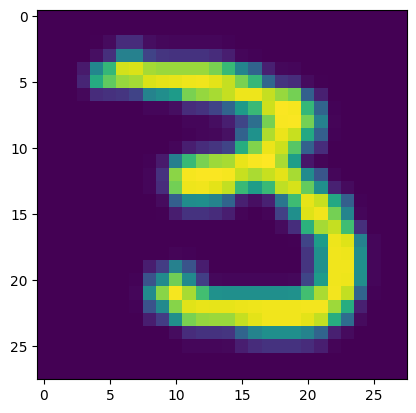

In [442]:
# Test space to see an image and the predicted class
sample: int = 2
x = test_images[sample]
plt.imshow(x[:,:,0].T, interpolation='nearest')
plt.show()


In [443]:
print("Predicted: " + str(class_map[np.argmax(predictions[sample])]))
print("Actual: " + str(class_map[test_labels[sample]]))

# Show some samples of predicted class and actual class
print("i : P : A")
print("---------")
for i in range(100):
    print(str(i) + " : " + str(class_map[np.argmax(predictions[i])]) + " : " + str(class_map[test_labels[i]]))

Predicted: 3
Actual: 3
i : P : A
---------
0 : a : a
1 : 0 : 0
2 : 3 : 3
3 : X : X
4 : U : U
5 : O : O
6 : e : e
7 : 5 : 5
8 : 8 : 8
9 : 2 : 2
10 : 4 : 4
11 : 2 : 2
12 : 1 : l
13 : 2 : 2
14 : 3 : 3
15 : 7 : 7
16 : W : W
17 : 7 : 7
18 : 5 : 5
19 : 3 : 3
20 : Y : y
21 : 1 : I
22 : k : k
23 : 1 : I
24 : a : a
25 : X : x
26 : C : C
27 : b : b
28 : 7 : 7
29 : r : r
30 : 7 : 7
31 : F : F
32 : 1 : 1
33 : 9 : 9
34 : C : c
35 : h : h
36 : i : i
37 : 8 : 8
38 : 5 : 5
39 : e : e
40 : 7 : 7
41 : h : h
42 : J : J
43 : 7 : 7
44 : T : t
45 : 0 : O
46 : 0 : O
47 : U : U
48 : 6 : 6
49 : 8 : 8
50 : 4 : 4
51 : l : l
52 : 5 : 5
53 : 9 : 9
54 : t : t
55 : w : w
56 : l : 1
57 : 8 : 8
58 : F : f
59 : K : K
60 : 7 : T
61 : 0 : 0
62 : S : S
63 : t : t
64 : t : t
65 : 8 : 8
66 : h : h
67 : 8 : 8
68 : S : S
69 : O : 0
70 : 0 : 0
71 : 2 : 2
72 : 7 : 7
73 : V : V
74 : 8 : 8
75 : 9 : g
76 : 0 : 0
77 : X : X
78 : e : e
79 : w : W
80 : 4 : 4
81 : 8 : 8
82 : 2 : 2
83 : 1 : 1
84 : 6 : 6
85 : d : d
86 : 9 : 9
87 : 5 : 5